1) Implement KNN classification, using the sklearn package. We learned how to do this in class.
   See also:  http://scikit-learn.org/stable/modules/neighbors.html#nearest- neighbors-classification

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split, cross_val_score

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

2) Use the sklearn package to implement cross-validation for your classifier. Use 5 folds for your cross-validation.  See also http://scikit-learn.org/stable/modules/cross_validation.html

3) Use your KNN classifier and cross-validation code from (1) and (2) above to determine the optimal value of K (number of nearest neighbors to consult) for this Iris dataset. Hint: This hyperparameter will be a number between 1 and 150 :)

4) Using matplotlib, plot classifier accuracy versus the hyperparameter K for a range of K that you consider interesting. Explain in words what you are seeing.

In [3]:
# Create the training (and test) set using scikit-learn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=8)

In [4]:
#Implement KNN

scores = []
n_neighbors = range(1, 51)
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append((clf.score(X_test, y_test)))
    
print scores

[0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.97777777777777775, 0.97777777777777775, 0.9555555555555556, 0.97777777777777775, 0.93333333333333335, 0.93333333333333335, 0.9555555555555556, 0.93333333333333335, 0.9555555555555556, 0.93333333333333335, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.93333333333333335, 0.91111111111111109, 0.91111111111111109, 0.93333333333333335, 0.93333333333333335, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.91111111111111109, 0.91111111111111109, 0.91111111111111109, 0.93333333333333335, 0.91111111111111109, 0.91111111111111109, 0.91111111111111109, 0.88888888888888884, 0.88888888888888884, 0.88888888888888884, 0.91111111111111109, 0.91111111111111109, 0.91111111111111109, 0.88888888888888884, 0.88888888888888884, 0.91111111111111109, 0.8

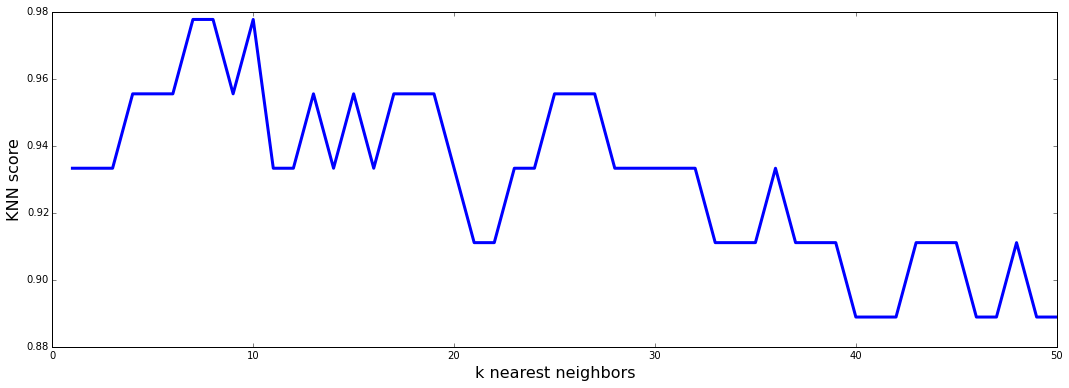

In [5]:
#Plot k v. knn_score

plt.figure(figsize=(18,6))
_ = plt.plot(n_neighbors, scores, linewidth=3.0)
plt.xlabel('k nearest neighbors', fontsize=16)
plt.ylabel('KNN score', fontsize=16)

In [6]:
# max_idx = [idx for idx, score in enumerate(scores) if score == max(scores)]

k = scores.index(max(scores))+1
print("K = %d" % (k))

K = 7


In [7]:
from sklearn.cross_validation import cross_val_score
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
scores = cross_val_score(clf, iris_df.values, iris.target, cv=5)

print("\nScores: %s\n"%(scores))      
print("Accuracy: %0.6f (+/- %0.6f)\n" % (scores.mean(), scores.std() * 2))


Scores: [ 0.96666667  1.          0.96666667  0.96666667  1.        ]

Accuracy: 0.980000 (+/- 0.032660)



5) Now, write your own implementation of cross-validation in Python without using the cross-validation methods from sklearn. Cross validation is a very important concept. Implementing it yourself in Python is the best way to learn and understand it. Compare the results of your cross-validation code with your results using the cross-validation in sklearn.

In [18]:
from sklearn.cross_validation import KFold

def cross_validate(X, y, classifier, k_fold) :

    # derive a set of (random) training and testing indices
    k_fold_indices = KFold( len(X), n_folds=k_fold, indices=True, shuffle=True, random_state=0)
    k_score_total = 0
    # for each training and testing slices run the classifier, and score the results
    for train_slice, test_slice in k_fold_indices:
        model = classifier(X[train_slice], y[train_slice])
        k_score = model.score(X[test_slice], y[test_slice])
        k_score_total += k_score
    
    return k_score_total/k_fold # return the average accuracy

In [17]:
# Steps for n-fold cross-validation:
#1) Randomly split the dataset into n equal partitions.
#2) Use partition 1 as test set & union of other partitions as training set.
#3) Find generalization error.
#4) Repeat steps 2-3 using a different partition as the test set at each iteration.
#5) Take the average generalization error as the estimate of OOS accuracy.

import random
import numpy
random.shuffle(iris.data)
folds = 5
folds = numpy.array_split(iris.data, folds, 0)

#for i in folds:
    

In [10]:
from sklearn.neighbors import KNeighborsClassifier
myKnn = KNeighborsClassifier(3).fit

score = cross_validate(X_train,y_train, myKnn ,5)
score

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:65: DeprecationWarning: The indices parameter is deprecated and will be removed (assumed True) in 0.17
  stacklevel=1)


0.97142857142857131

In [11]:
def k_fold_cross_validation(X, K, randomise = False):
    if randomise: from random import shuffle; X=list(X); shuffle(X)
    for k in xrange(K):
        training = [x for i, x in enumerate(X) if i % K != k]
        validation = [x for i, x in enumerate(X) if i % K == k]
        yield training, validation

X = [i for i in xrange(97)]
for training, validation in k_fold_cross_validation(X, K=7):
    for x in X: assert (x in training) ^ (x in validation), x